## 청라, 송도지역 미세먼지 측정값 스크래핑
> 1. 송도 = http://air.incheon.go.kr/airinch/real3.html?area_other_index=999992
> 1. 청라 = http://air.incheon.go.kr/airinch/real3.html?area_other_index=999991

* Todo: 계측 센서 갯수가 다르므로 필터링 방식이 달라져야 한다
* 송도 = 6개 / 청라 = 4개

In [1]:
"""
* 청라, 송도지역 미세먼지 측정값 스크래핑
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [2]:
URLS = [
    'http://air.incheon.go.kr/airinch/real3.html?area_other_index=999991',
    'http://air.incheon.go.kr/airinch/real3.html?area_other_index=999992',
]

""" 주의!: 송도와 청라는 데이터 갯수가 틀려서 필터링 방법을 달리해야 함. """
URL = URLS[0]  # 0=청라 - 측정치 1+3 = 4개
URL = URLS[1]  # 1=송도 - 측정치 1+6 = 7개

RESPONSE = requests.get(URL)
SOUP = BeautifulSoup(RESPONSE.content, 'html.parser')
TABLE = SOUP.find_all('table', {'class': 'view'})

TDS = TABLE[0].find_all('td')
FONTS = TABLE[0].find_all('font')
SPANS = TABLE[0].find_all('span')

DATA = []
DATE = []

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


## 데이터의 길이를 기준으로 구분한다 (EDA)
> 12자 길이를 넘어가는 데이터는 한글 테이터이다.

In [3]:
for n, span in enumerate(SPANS, 0):
    neat_span = str(span.text).strip()

    if len(neat_span) > 12:
        """ 날짜와 시간을 분리해서 각각 넣는다 """
        DATE.append(neat_span[:-3])     # 날짜
        DATA.append(neat_span[-3:])     # 시간
    else:
        DATA.append(neat_span)

In [4]:
""" 리스트에 담긴 해당 날짜를 보여준다, 그래봤자 2개 지만.. """
print(DATE[0])
print(DATE[1])

2018년09월 08일
2018년09월 07일


In [5]:
START = 8               # 8,
REPEAT = 100

NUM = 0
for n in range(START, (6 * (REPEAT + 2)), 7):
    datum = DATA[n:n + 7]

    if len(datum) is not 0:
        NUM += 1
        print("%2s .. %s" % (NUM, datum))
    else:
        break

 1 .. ['01시', '0.004', '0.013', '0.035', '0.3', '19', '7']
 2 .. ['24시', '0.004', '0.013', '0.033', '0.3', '18', '5']
 3 .. ['23시', '0.004', '0.013', '0.032', '0.3', '19', '5']
 4 .. ['22시', '0.004', '0.014', '0.034', '0.3', '16', '6']
 5 .. ['21시', '0.004', '0.014', '0.033', '0.3', '17', '5']
 6 .. ['20시', '0.003', '0.014', '0.035', '0.3', '18', '6']
 7 .. ['19시', '0.003', '0.014', '0.036', '0.3', '16', '6']
 8 .. ['18시', '0.003', '0.012', '0.039', '0.3', '19', '7']
 9 .. ['17시', '0.003', '0.012', '0.043', '0.3', '17', '7']
10 .. ['16시', '0.004', '0.012', '0.046', '0.3', '21', '6']
11 .. ['15시', '0.004', '0.011', '0.048', '0.3', '22', '8']
12 .. ['14시', '0.004', '0.010', '0.049', '0.4', '21', '9']
13 .. ['13시', '0.004', '0.009', '0.049', '0.3', '23', '9']
14 .. ['12시', '0.004', '0.011', '0.046', '0.4', '22', '10']
15 .. ['11시', '0.004', '0.012', '0.046', '0.4', '21', '7']
16 .. ['10시', '0.004', '0.011', '0.047', '0.4', '24', '9']
17 .. ['09시', '0.004', '0.014', '0.043', '0.4', '25', '

In [6]:
COLUMNS = ['Time(24Hr)',]

for n in range(2,8):
    COLUMNS.append(DATA[n])

COLUMNS

['Time(24Hr)',
 'SO2(ppm)',
 'NO2(ppm)',
 'O3(ppm)',
 'CO(ppm)',
 'PM10(㎍/㎥)',
 'PM2.5(㎍/㎥)']

In [7]:
START = 8               
REPEAT = 100

AIR_DATA = []

for n in range(START, (6 * (REPEAT + 2)), 7):
    datum = DATA[n:n + 7]             # 시간 + 센서값6개

    if len(datum) is not 0:
        datum[0] = datum[0][:2]            # (시간) 숫자 만 잘라냄
        AIR_DATA.append(datum)
    else:
        break

AIR_DATA 

[['01', '0.004', '0.013', '0.035', '0.3', '19', '7'],
 ['24', '0.004', '0.013', '0.033', '0.3', '18', '5'],
 ['23', '0.004', '0.013', '0.032', '0.3', '19', '5'],
 ['22', '0.004', '0.014', '0.034', '0.3', '16', '6'],
 ['21', '0.004', '0.014', '0.033', '0.3', '17', '5'],
 ['20', '0.003', '0.014', '0.035', '0.3', '18', '6'],
 ['19', '0.003', '0.014', '0.036', '0.3', '16', '6'],
 ['18', '0.003', '0.012', '0.039', '0.3', '19', '7'],
 ['17', '0.003', '0.012', '0.043', '0.3', '17', '7'],
 ['16', '0.004', '0.012', '0.046', '0.3', '21', '6'],
 ['15', '0.004', '0.011', '0.048', '0.3', '22', '8'],
 ['14', '0.004', '0.010', '0.049', '0.4', '21', '9'],
 ['13', '0.004', '0.009', '0.049', '0.3', '23', '9'],
 ['12', '0.004', '0.011', '0.046', '0.4', '22', '10'],
 ['11', '0.004', '0.012', '0.046', '0.4', '21', '7'],
 ['10', '0.004', '0.011', '0.047', '0.4', '24', '9'],
 ['09', '0.004', '0.014', '0.043', '0.4', '25', '12'],
 ['08', '0.004', '0.013', '0.048', '0.5', '32', '15'],
 ['07', '0.003', '0.010',

In [8]:
len(AIR_DATA)

25

In [9]:
# Numpy Array 로 변경 한다.
AIR_DATA_NP = np.array(AIR_DATA)
AIR_DATA_NP

array([['01', '0.004', '0.013', '0.035', '0.3', '19', '7'],
       ['24', '0.004', '0.013', '0.033', '0.3', '18', '5'],
       ['23', '0.004', '0.013', '0.032', '0.3', '19', '5'],
       ['22', '0.004', '0.014', '0.034', '0.3', '16', '6'],
       ['21', '0.004', '0.014', '0.033', '0.3', '17', '5'],
       ['20', '0.003', '0.014', '0.035', '0.3', '18', '6'],
       ['19', '0.003', '0.014', '0.036', '0.3', '16', '6'],
       ['18', '0.003', '0.012', '0.039', '0.3', '19', '7'],
       ['17', '0.003', '0.012', '0.043', '0.3', '17', '7'],
       ['16', '0.004', '0.012', '0.046', '0.3', '21', '6'],
       ['15', '0.004', '0.011', '0.048', '0.3', '22', '8'],
       ['14', '0.004', '0.010', '0.049', '0.4', '21', '9'],
       ['13', '0.004', '0.009', '0.049', '0.3', '23', '9'],
       ['12', '0.004', '0.011', '0.046', '0.4', '22', '10'],
       ['11', '0.004', '0.012', '0.046', '0.4', '21', '7'],
       ['10', '0.004', '0.011', '0.047', '0.4', '24', '9'],
       ['09', '0.004', '0.014', '0.043'

In [10]:
# Pandas DataFrame 오브젝트로 변경한다.
df = pd.DataFrame(AIR_DATA_NP, columns=COLUMNS)
df.head(n=10)

,Time(24Hr),SO2(ppm),NO2(ppm),O3(ppm),CO(ppm),PM10(㎍/㎥),PM2.5(㎍/㎥)
0,01,0.004,0.013,0.035,0.3,19,7
1,24,0.004,0.013,0.033,0.3,18,5
2,23,0.004,0.013,0.032,0.3,19,5
3,22,0.004,0.014,0.034,0.3,16,6
4,21,0.004,0.014,0.033,0.3,17,5
5,20,0.003,0.014,0.035,0.3,18,6
6,19,0.003,0.014,0.036,0.3,16,6
7,18,0.003,0.012,0.039,0.3,19,7
8,17,0.003,0.012,0.043,0.3,17,7
9,16,0.004,0.012,0.046,0.3,21,6


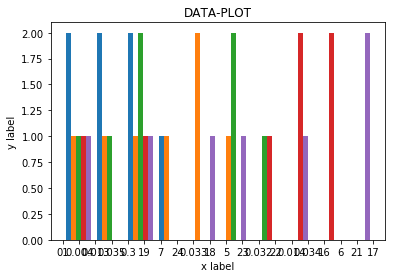

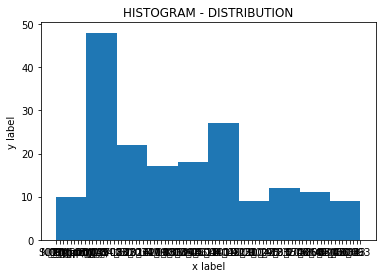

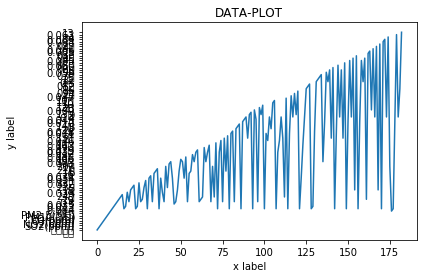

In [11]:
""" 1. 그래프를 그리는 옵션 """
# x축의 해상도를 설정한다 (시작, 끝, div_number)

x_args = [0, 50, 50]
# x = np.linspace(*x_args)    

plt.hist(df.head(5))
""" 그래프에 텍스트를 입히는 옵션 """
plt.title("DATA-PLOT")        # 타이틀
plt.xlabel('x label')           # x 라벨
plt.ylabel('y label')           # y 라벨
plt.show()

plt.hist(DATA)
""" 그래프에 텍스트를 입히는 옵션 """
plt.title("HISTOGRAM - DISTRIBUTION")        # 타이틀
plt.xlabel('x label')           # x 라벨
plt.ylabel('y label')           # y 라벨
plt.show()

plt.plot(DATA)
""" 그래프에 텍스트를 입히는 옵션 """
plt.title("DATA-PLOT")        # 타이틀
plt.xlabel('x label')           # x 라벨
plt.ylabel('y label')           # y 라벨
plt.show()

> 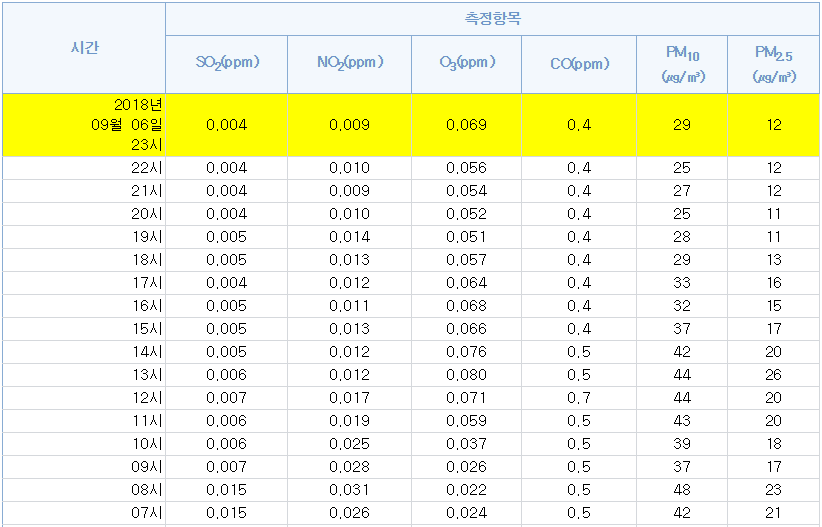

In [12]:
# Data Frame 을 엑셀로 저장한다. (CSV화일)
df.to_csv('air_incheon.csv', sep=',', encoding='utf-8')